In [1]:
# Importing all the necessary packages

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split,GridSearchCV
# from sklearn.preprocessing import TargetEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from imblearn.over_sampling import SMOTE
# import lightgbm as lgb
# from sklearn.neighbors import KNeighborsClassifier
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.metrics import accuracy_score , confusion_matrix , classification_report,roc_auc_score

In [2]:
# Cleaning the data

df = pd.read_csv('heart_2022_with_nans.csv')
df.drop_duplicates()
df.dropna(inplace=True)
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246022 entries, 342 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24602

In [4]:
for i in df.columns:
    print(f"{i} Column has : {df[i].unique()}\n")

State Column has : ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Sex Column has : ['Female' 'Male']

GeneralHealth Column has : ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

PhysicalHealthDays Column has : [ 4.  0.  5.  3.  2. 25. 30. 15. 29.  8. 16. 20. 10.  9.  7.  1. 21.  6.
 27. 14. 12. 11. 13. 28. 17. 23. 24. 26. 18. 22. 19.]

MentalHealthDays Column has : [ 0. 15.  4. 25.  5. 30. 27.  3.  2

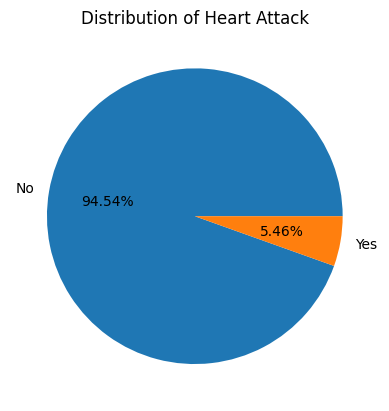

In [5]:
# Pie chart for distribution of heart attacks

heart_attack_pie = df['HadHeartAttack'].value_counts()
plt.pie(heart_attack_pie, labels=heart_attack_pie.index, autopct='%1.2f%%')
plt.title('Distribution of Heart Attack')
plt.show()

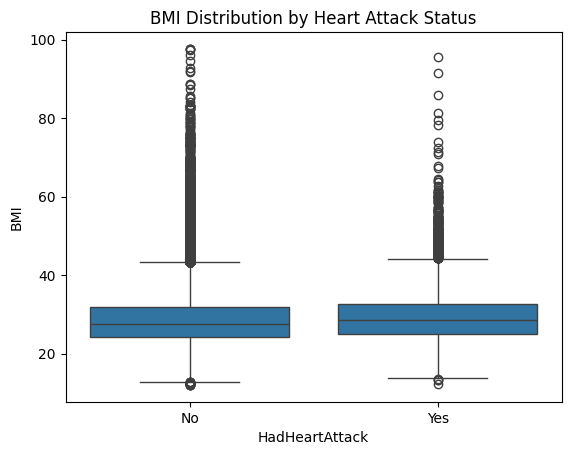

In [6]:
# Visualizations for Demographic factors

df2 = df[['HadHeartAttack', 'Sex', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI']]
sns.boxplot(x='HadHeartAttack', y='BMI', data=df2)
plt.title('BMI Distribution by Heart Attack Status')
plt.show()

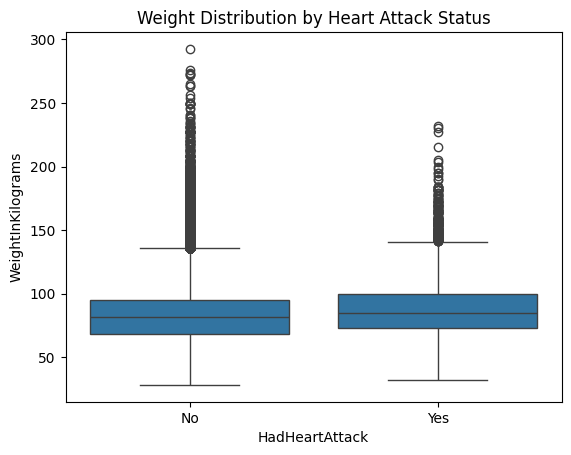

In [7]:
sns.boxplot(x='HadHeartAttack', y='WeightInKilograms', data=df2)
plt.title('Weight Distribution by Heart Attack Status')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19056\1964611935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['HadHeartAttackNumeric'] = df2['HadHeartAttack'].map({'Yes': 1, 'No': 0})


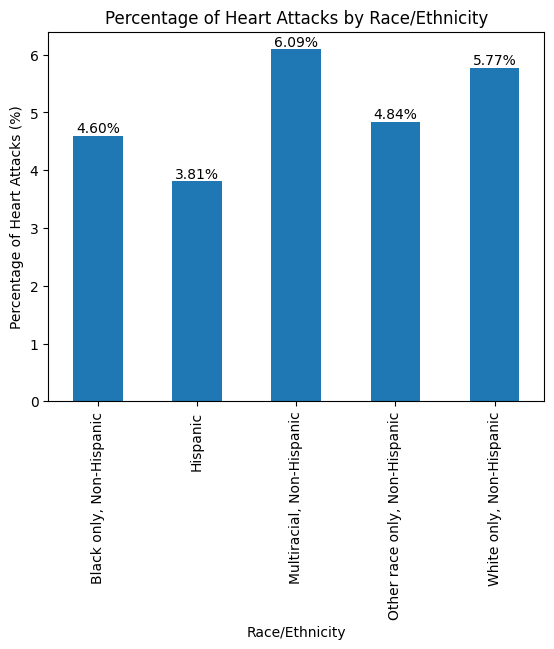

In [8]:
# Race by percentage

df2['HadHeartAttackNumeric'] = df2['HadHeartAttack'].map({'Yes': 1, 'No': 0})
heart_attack_by_race = df2.groupby('RaceEthnicityCategory')['HadHeartAttackNumeric'].mean() * 100
heart_attack_by_race.plot(kind='bar')
for i, (race, percent) in enumerate(heart_attack_by_race.items()):
    plt.text(i,percent,s=f'{percent:.2f}%',ha='center',va='bottom')
plt.title('Percentage of Heart Attacks by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percentage of Heart Attacks (%)')
plt.show()

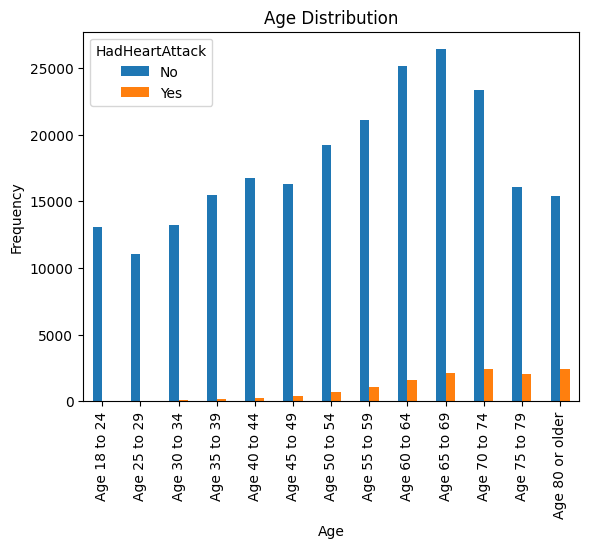

In [9]:
age_groups = df2.groupby(['AgeCategory','HadHeartAttack']).size()

# Plot the bar chart
age_groups.unstack().plot(kind='bar', title='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

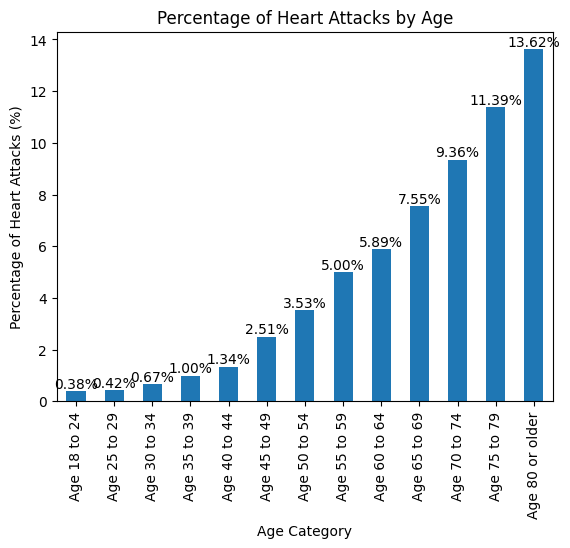

In [10]:
heart_attack_by_age = df2.groupby('AgeCategory')['HadHeartAttackNumeric'].mean() * 100
heart_attack_by_age.plot(kind='bar')
for i, (age, percent) in enumerate(heart_attack_by_age.items()):
    plt.text(i,percent,s=f'{percent:.2f}%',ha='center',va='bottom')
plt.title('Percentage of Heart Attacks by Age')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Heart Attacks (%)')
plt.show()

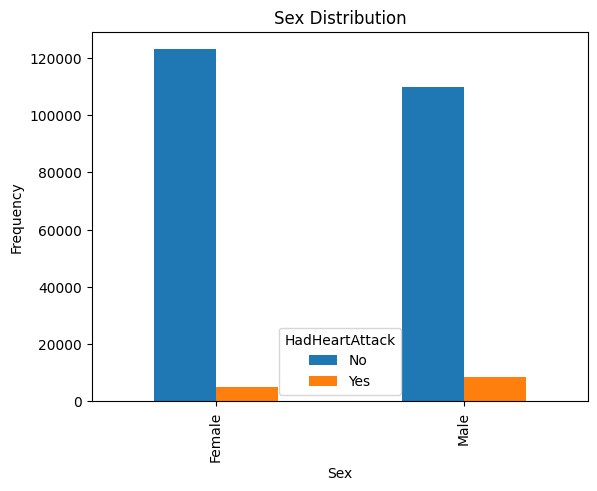

In [11]:
sex_groups = df2.groupby(['Sex','HadHeartAttack']).size()

# Plot the bar chart
sex_groups.unstack().plot(kind='bar', title='Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

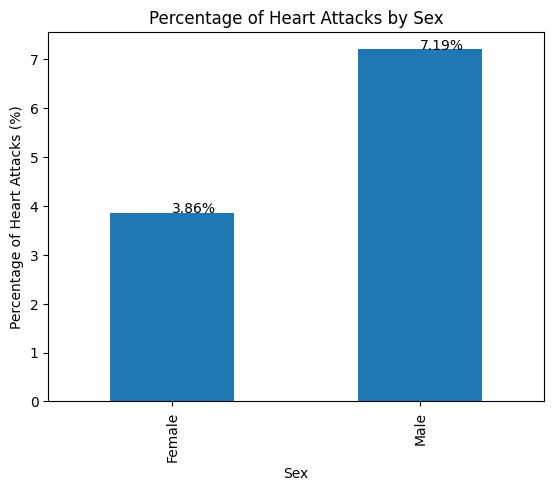

In [12]:
heart_attack_by_sex = df2.groupby('Sex')['HadHeartAttackNumeric'].mean() * 100
heart_attack_by_sex.plot(kind='bar')
for i, (sex, percent) in enumerate(heart_attack_by_sex.items()):
    plt.text(i,percent,s=f'{percent:.2f}%')
plt.title('Percentage of Heart Attacks by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage of Heart Attacks (%)')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19056\3922322958.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BMI Categories'] = df2['BMI'].apply(get_bmi)


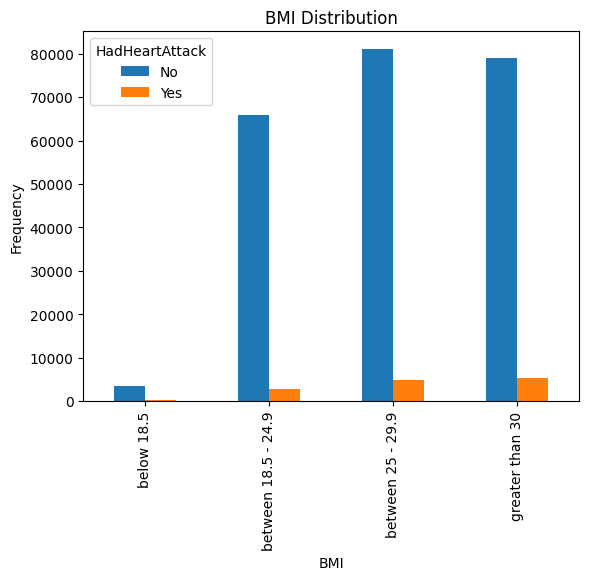

In [13]:
def get_bmi(i):
    if i < 18.5:
        return 'below 18.5'
    elif i >= 18.5 and i <= 24.9:
        return 'between 18.5 - 24.9'
    elif i >= 25 and i <= 29.9:
        return 'between 25 - 29.9'
    elif i >= 30:
        return 'greater than 30'

df2['BMI Categories'] = df2['BMI'].apply(get_bmi)

# Plot the bar chart
bmi_groups = df2.groupby(['BMI Categories','HadHeartAttack']).size()
bmi_groups.unstack().plot(kind='bar', title='BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

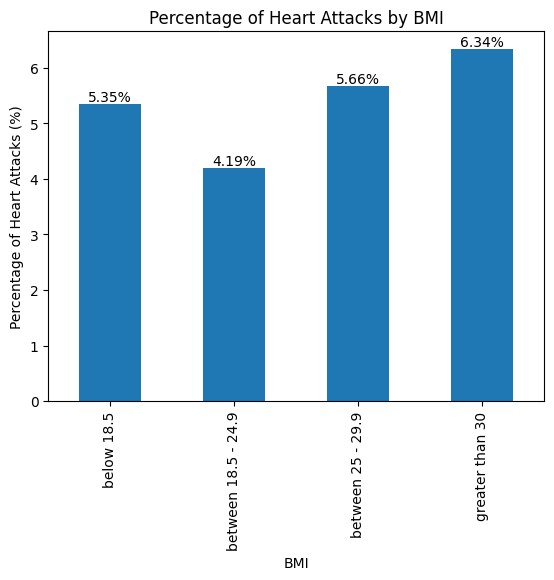

In [14]:
heart_attack_by_bmi = df2.groupby('BMI Categories')['HadHeartAttackNumeric'].mean() * 100
heart_attack_by_bmi.plot(kind='bar')
for i, (bmi, percent) in enumerate(heart_attack_by_bmi.items()):
    plt.text(i,percent,s=f'{percent:.2f}%',ha='center',va='bottom')
plt.title('Percentage of Heart Attacks by BMI')
plt.xlabel('BMI')
plt.ylabel('Percentage of Heart Attacks (%)')
plt.show()

In [15]:
# mean bmi, weight, height of females and males if they had heart attack, didn't have heart attack, and in general

df2[['HeightInMeters','WeightInKilograms', 'BMI']].mean()

HeightInMeters        1.705150
WeightInKilograms    83.615179
BMI                  28.668136
dtype: float64

In [16]:
mean_groups = df2.groupby(['HadHeartAttack','Sex'])
mean_groups[['HeightInMeters','WeightInKilograms','BMI']].mean()

HeightInMeters  WeightInKilograms        BMI
HadHeartAttack Sex                                                 
No             Female        1.634639          76.403960  28.580359
               Male          1.782874          91.274544  28.665506
Yes            Female        1.618749          77.592437  29.591657
               Male          1.771434          92.496502  29.434884

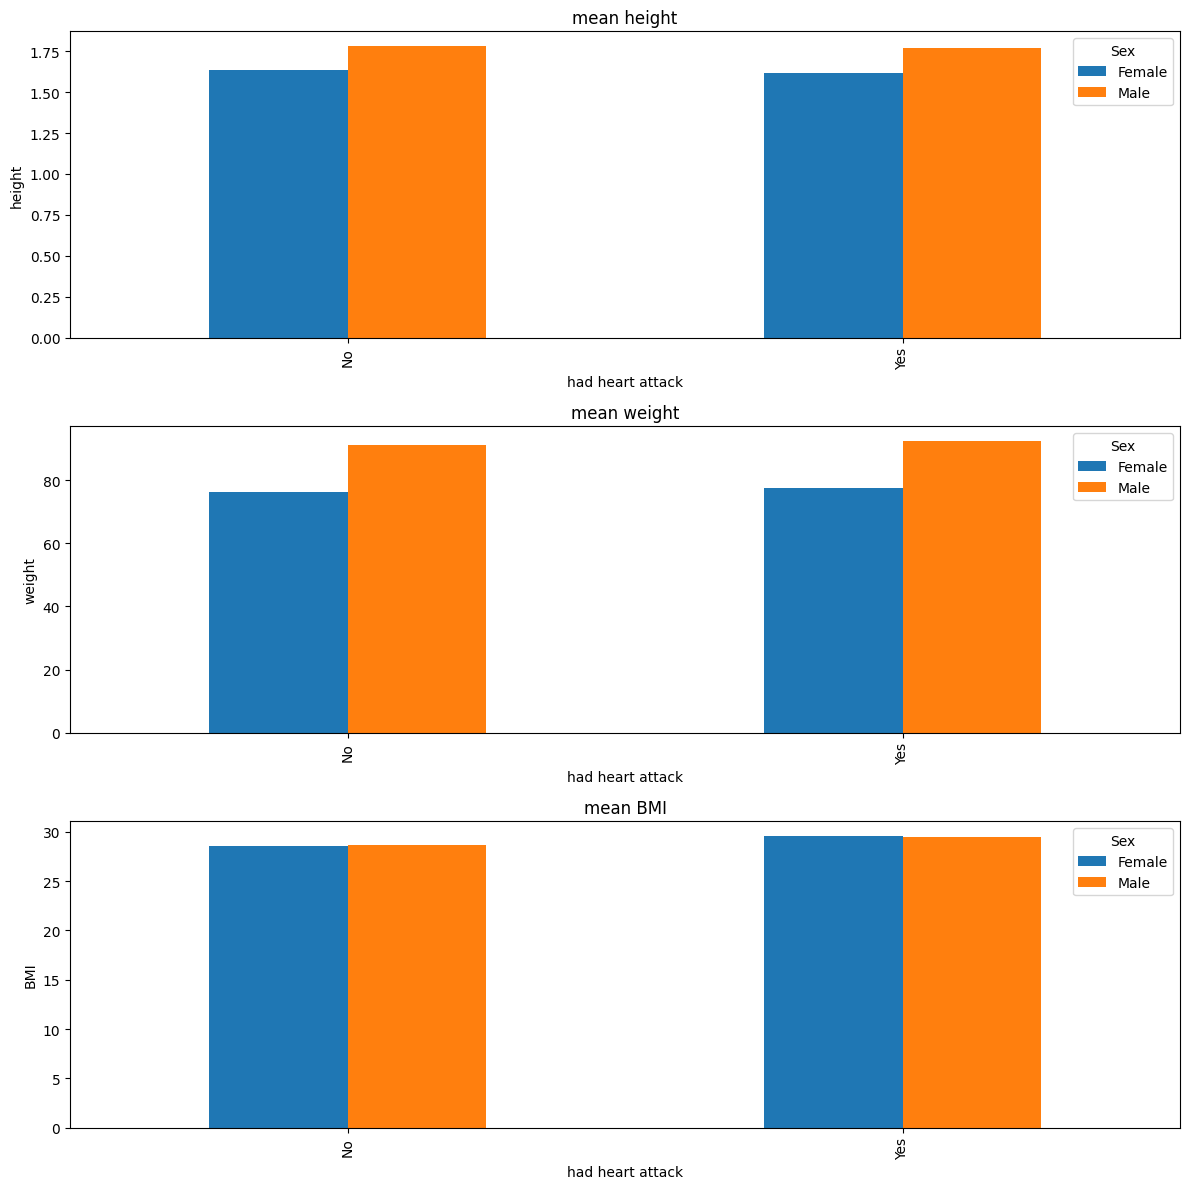

In [17]:
mean_height = mean_groups['HeightInMeters'].mean()
mean_weight = mean_groups['WeightInKilograms'].mean()
mean_BMI = mean_groups['BMI'].mean()

# Plot barcharts
col_n = 1
row_n = 3
fig, axes = plt.subplots(row_n, col_n, figsize=(12,12))

mean_height.unstack().plot(kind='bar', ax = axes[0])
axes[0].set_title('mean height')
axes[0].set_xlabel('had heart attack')
axes[0].set_ylabel('height')

mean_weight.unstack().plot(kind='bar', ax = axes[1])
axes[1].set_title('mean weight')
axes[1].set_xlabel('had heart attack')
axes[1].set_ylabel('weight')

mean_BMI.unstack().plot(kind='bar', ax = axes[2])
axes[2].set_title('mean BMI')
axes[2].set_xlabel('had heart attack')
axes[2].set_ylabel('BMI')

plt.tight_layout()

In [18]:
had_heartattack = df2[df2['HadHeartAttack'] == 'Yes']

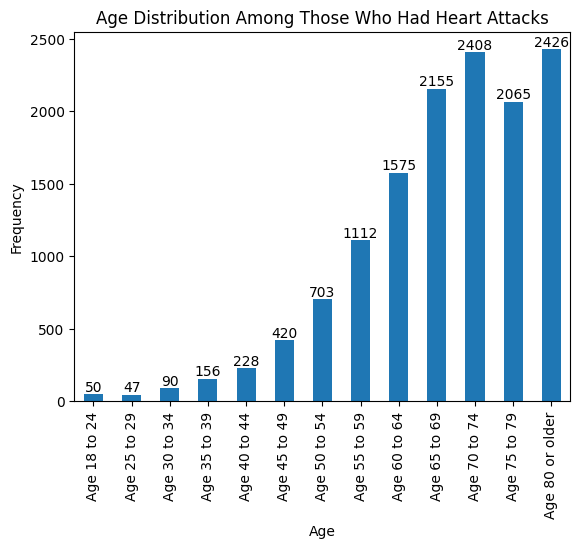

In [19]:
# age
age_grouped = had_heartattack.groupby('AgeCategory')

# Plot the bar chart
age_grouped.size().plot(kind='bar', title='Age Distribution Among Those Who Had Heart Attacks')
plt.xlabel('Age')
plt.ylabel('Frequency')
for i, (age, size) in enumerate(age_grouped.size().items()):
    plt.text(i,size,s=str(size),ha='center',va='bottom')
plt.show()

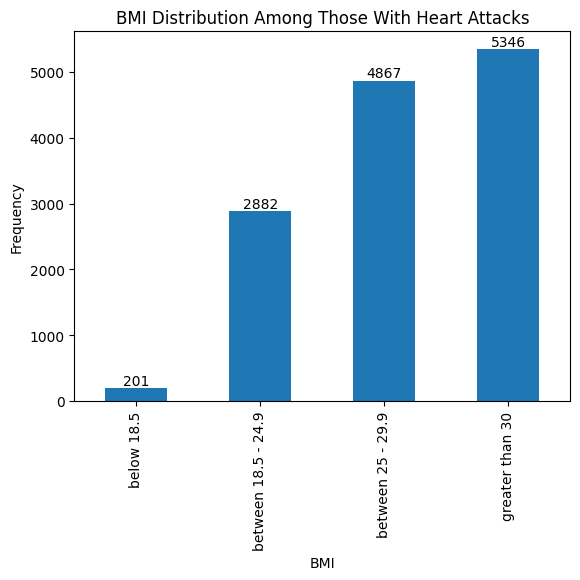

In [20]:
bmi_grouped = had_heartattack.groupby('BMI Categories')

# Plot the bar chart
bmi_grouped.size().plot(kind='bar', title='BMI Distribution Among Those With Heart Attacks')
plt.xlabel('BMI')
plt.ylabel('Frequency')
for i, (bmi, size) in enumerate(bmi_grouped.size().items()):
    plt.text(i,size,s=str(size), ha='center',va='bottom')
plt.show()

Text(0.5, 0, 'Weight in Kg')

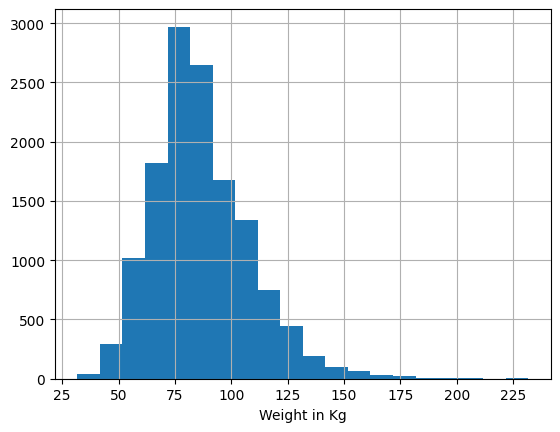

In [21]:
had_heartattack['WeightInKilograms'].hist(bins=20)
plt.xlabel('Weight in Kg')

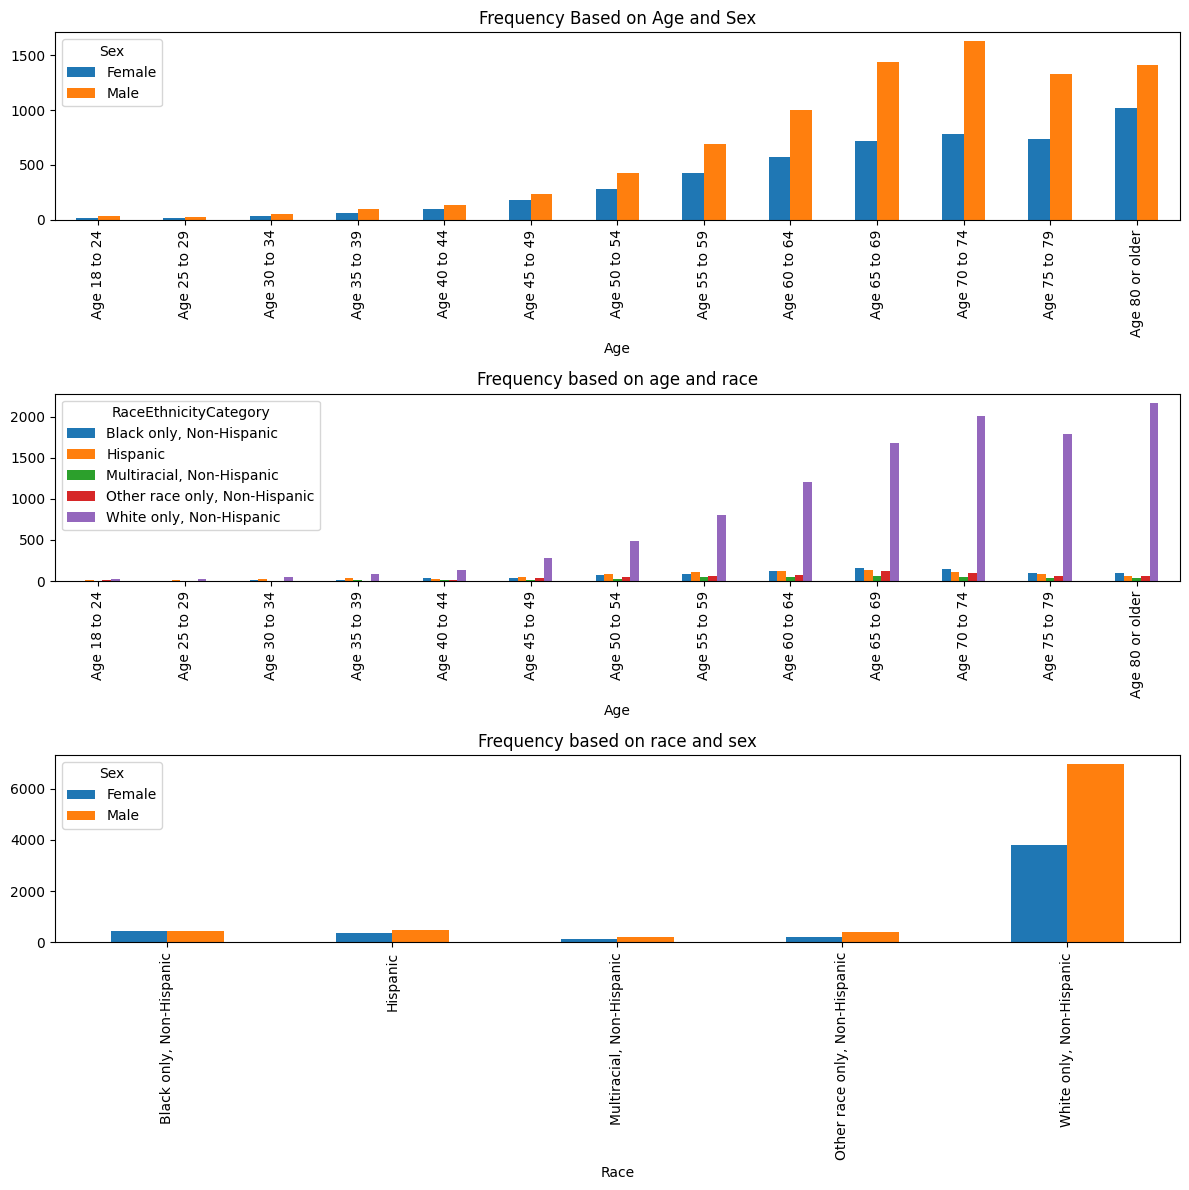

In [22]:
col_n = 1
row_n = 3
fig, axes = plt.subplots(row_n, col_n, figsize=(12,12))

age_sex = had_heartattack.groupby(['AgeCategory','Sex']).size()
age_sex.unstack().plot(kind='bar',ax=axes[0])
axes[0].set_title('Frequency Based on Age and Sex')
axes[0].set_xlabel('Age')

age_race = had_heartattack.groupby(['AgeCategory','RaceEthnicityCategory']).size()
age_race.unstack().plot(kind='bar',ax=axes[1])
axes[1].set_title('Frequency based on age and race')
axes[1].set_xlabel('Age')

race_sex = had_heartattack.groupby(['RaceEthnicityCategory','Sex']).size()
race_sex.unstack().plot(kind='bar',ax=axes[2])
axes[2].set_title('Frequency based on race and sex')
axes[2].set_xlabel('Race')

plt.tight_layout()

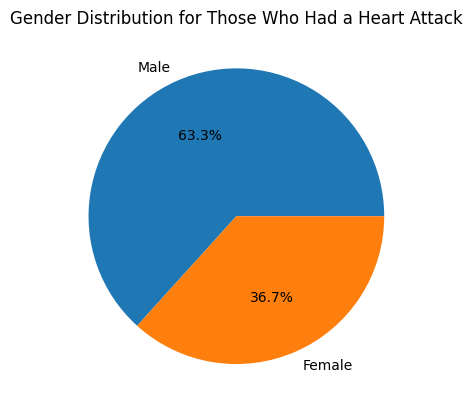

In [23]:
sex_counts = had_heartattack['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution for Those Who Had a Heart Attack')
plt.show()

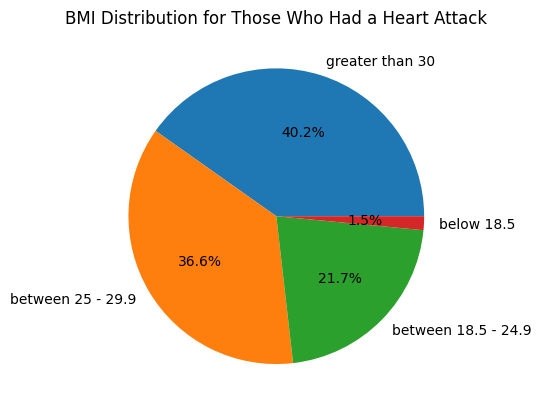

In [24]:
bmi_counts = had_heartattack['BMI Categories'].value_counts()
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%')
plt.title('BMI Distribution for Those Who Had a Heart Attack')
plt.show()

In [25]:
# Geographic Analysis
df.groupby('State').size().reset_index(name='count')['State'].values

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [26]:
df.groupby('State')['PhysicalHealthDays'].mean().values

array([4.64405889, 4.21123245, 4.56279751, 5.50646259, 4.18014129,
       3.77049816, 3.97249159, 3.77540603, 2.87826087, 4.53082707,
       4.30735235, 3.54099419, 3.55110793, 4.19146482, 3.82585347,
       4.37313704, 3.74435825, 3.59544345, 4.90468297, 4.65016611,
       4.03908199, 3.91620295, 3.60182983, 4.07094972, 3.54426373,
       3.83470057, 4.67199046, 4.15173546, 3.90464069, 4.93951385,
       3.90095847, 3.77060751, 4.78066038, 3.91381822, 3.85652685,
       3.49239392, 4.47804336, 4.47942877, 4.13545425, 4.05386588,
       5.06603511, 4.27313625, 4.14915006, 3.56390465, 4.90862385,
       4.38782397, 4.06104597, 3.74200206, 3.1897712 , 4.09667565,
       4.15293333, 5.69367855, 4.0532158 , 3.92406639])

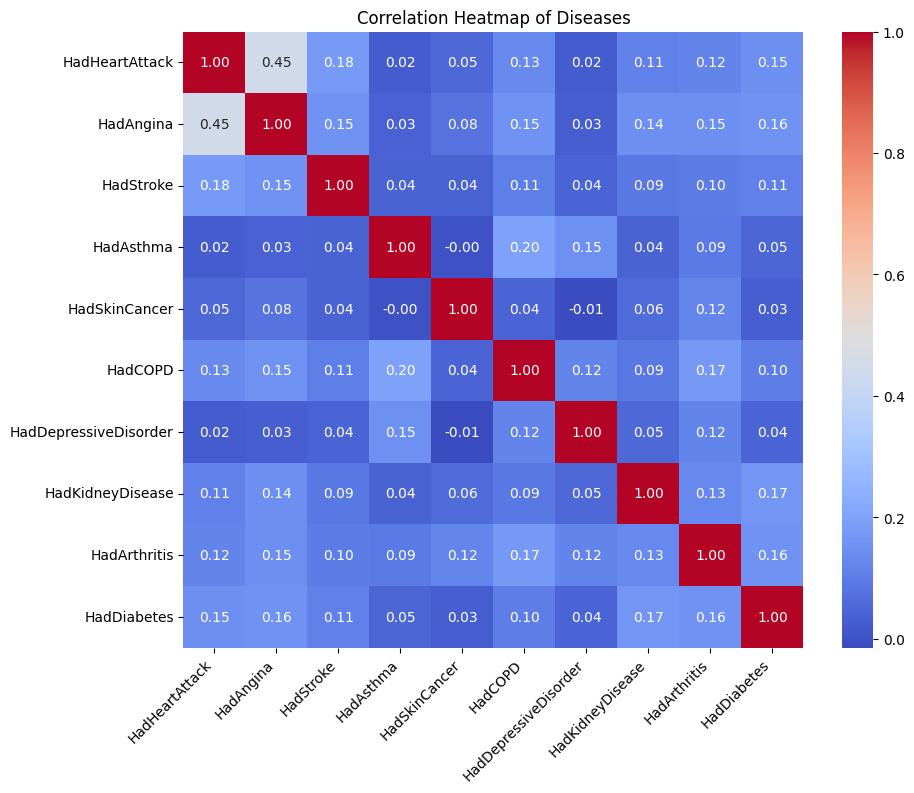

In [27]:
df_disease_data = df.copy()
# Filter only disease-related columns
disease_columns = [
    'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes'
]

# Subset the data for disease analysis
df_disease_data = df[disease_columns]

# Convert Yes/No to binary (Yes=1, No=0)
df_disease_data = df_disease_data.map(lambda x: 1 if x == 'Yes' else 0)

# Calculate correlation matrix
correlation_matrix = df_disease_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Diseases")
plt.xticks(rotation=45, ha='right')
plt.show()

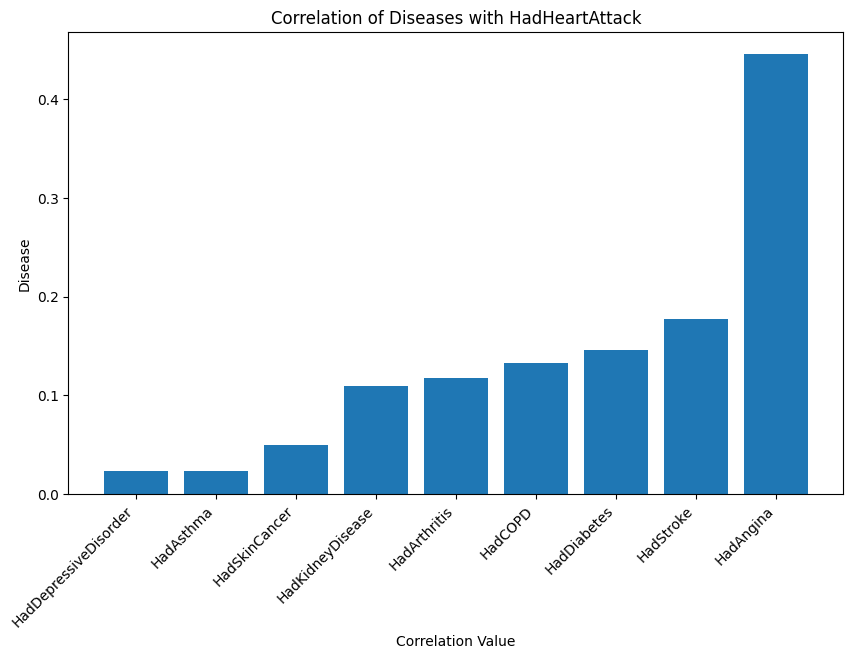

In [28]:
# Extract correlations of 'HadHeartAttack' with other diseases
had_heart_attack_corr = correlation_matrix['HadHeartAttack'].drop('HadHeartAttack')

# Sort correlations in increasing order
sorted_corr = had_heart_attack_corr.sort_values()

# Plot the vertical bar chart without color
plt.figure(figsize=(10, 6))
plt.bar(sorted_corr.index, sorted_corr.values)
plt.title("Correlation of Diseases with HadHeartAttack")
plt.xlabel("Correlation Value")
plt.ylabel("Disease")
plt.xticks(rotation=45, ha='right')
plt.show()

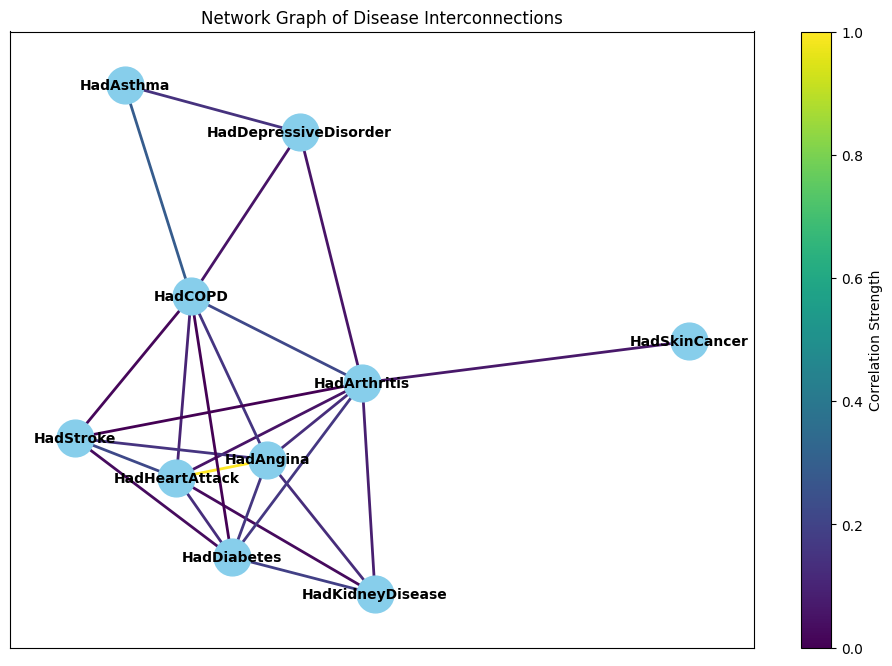

In [29]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes for each disease
disease_nodes = disease_columns
G.add_nodes_from(disease_nodes)

# Add weighted edges based on correlation
for i, disease1 in enumerate(disease_nodes):
    for j, disease2 in enumerate(disease_nodes):
        if i < j:  # Avoid duplicates
            weight = correlation_matrix.loc[disease1, disease2]
            if weight > 0.1:  # Filter low correlations for clarity
                G.add_edge(disease1, disease2, weight=weight)

# Draw the network graph
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
plt.figure(figsize=(12, 8))

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
edges = nx.draw_networkx_edges(
    G, pos, edge_color=[G[u][v]['weight'] for u, v in G.edges()], edge_cmap=plt.cm.viridis, width=2
)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Add colorbar for edge weights
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, label='Correlation Strength', ax=plt.gca())  # Use the current Axes

plt.title('Network Graph of Disease Interconnections')
plt.show()

In [31]:
import folium
import pandas as pd

datafile = "heart_2022_with_nans.csv"
df = pd.read_csv(datafile)
# Center the map at a central location in the US (latitude, longitude)
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Adjust the center and zoom level as needed

# Load your state GeoJSON data
geojson_file = 'us-states.json'  # Make sure you have this file with state boundaries

# Your state-level data (example)
sizes={}
population=np.array([5108468,733406,7431344,3067732,38965193,5877610,3617176,1031890,678972,22610726,11029227,153836,1435138,1964726,12549689,6862199,3207004,2940546,4526154,4573749,1395722,6180253,7001399,10037261,5737915,2939690,6196156,1132812,1978379,3194176,1402054,9290841,2114371,19571216,10835491,783926,11785935,4053824,4233358,12961683,3205691,1095962,5373555,919318,7126489,30503301,3417734,647464,87146,8715698,7812880,1770071,5910955,584057])
sizes['State']=df.groupby('State').size().reset_index(name='count')['State'].values
sizes['size']=(df.groupby('State').size().values/population)*100

sizes_df = pd.DataFrame(sizes)

# Create the choropleth map
folium.Choropleth(
    geo_data=geojson_file,
    data=sizes_df,
    columns=['State', 'size'],
    key_on='feature.properties.name',
    fill_color='Blues', fill_opacity=0.8, line_opacity=0.8,
    #legend_name='Map'
).add_to(m)

# Add title
title_html = ''' <h3 align="center" style="font-size:20px"><b> Representation of Data by State</b></h3>'''

m.get_root().html.add_child(folium.Element(title_html))
folium.GeoJson( geojson_file, style_function=lambda feature: { 'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0, 'weight': 0.1 }, tooltip=folium.GeoJsonTooltip( fields=['name'], aliases=['State: '], localize=True ) ).add_to(m)


folium.LayerControl().add_to(m)


m.save('map1.html')
m


In [32]:
import folium
import pandas as pd

# Center the map at a central location in the US (latitude, longitude)
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Adjust the center and zoom level as needed

# Load your state GeoJSON data
geojson_file = 'us-states.json'  # Make sure you have this file with state boundaries

# Your state-level data (example)
sizes={}
sizes['State']=df.groupby('State').size().reset_index(name='count')['State'].values
sizes['size']=df.groupby('State')['PhysicalHealthDays'].mean().values

sizes_df = pd.DataFrame(sizes)

# Create the choropleth map
folium.Choropleth(
    geo_data=geojson_file,
    data=sizes_df,
    columns=['State', 'size'],
    key_on='feature.properties.name',
    fill_color='Purples', fill_opacity=0.8, line_opacity=0.8,
    #legend_name='Map'
).add_to(m)

# Add title
title_html = ''' <h3 align="center" style="font-size:20px"><b> Avg Physical Healthy Days by State</b></h3>'''

m.get_root().html.add_child(folium.Element(title_html))
folium.GeoJson( geojson_file, style_function=lambda feature: { 'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0, 'weight': 0.1 }, tooltip=folium.GeoJsonTooltip( fields=['name'], aliases=['State: '], localize=True ) ).add_to(m)


folium.LayerControl().add_to(m)


m.save('map2.html')
m

In [33]:
import folium
import pandas as pd

# Center the map at a central location in the US (latitude, longitude)
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Adjust the center and zoom level as needed

# Load your state GeoJSON data
geojson_file = 'us-states.json'  # Make sure you have this file with state boundaries

# Your state-level data (example)
sizes={}
sizes['State']=df.groupby('State').size().reset_index(name='count')['State'].values
df_filtered = df[df['HadHeartAttack'] == 'Yes']
sizes['size']=(df_filtered.groupby('State')['HadHeartAttack'].count().values/df.groupby('State')['HadHeartAttack'].count().values)*100

sizes_df = pd.DataFrame(sizes)

# Create the choropleth map
folium.Choropleth(
    geo_data=geojson_file,
    data=sizes_df,
    columns=['State', 'size'],
    key_on='feature.properties.name',
    fill_color='RdYlGn_r', fill_opacity=0.8, line_opacity=0.8,
    #legend_name='Map'
).add_to(m)

# Add title
title_html = ''' <h3 align="center" style="font-size:20px"><b> Percentage of Heart Attacks by State</b></h3>'''

m.get_root().html.add_child(folium.Element(title_html))
folium.GeoJson( geojson_file, style_function=lambda feature: { 'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0, 'weight': 0.1 }, tooltip=folium.GeoJsonTooltip( fields=['name'], aliases=['State: '], localize=True ) ).add_to(m)


folium.LayerControl().add_to(m)

m.save('map3.html')
m

In [34]:
import folium
import pandas as pd

# Center the map at a central location in the US (latitude, longitude)
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Adjust the center and zoom level as needed

# Load your state GeoJSON data
geojson_file = 'us-states.json'  # Make sure you have this file with state boundaries

# Your state-level data (example)
sizes={}
sizes['State']=df.groupby('State').size().reset_index(name='count')['State'].values
sizes['size']=df.groupby('State')['BMI'].mean().values

sizes_df = pd.DataFrame(sizes)

# Create the choropleth map
folium.Choropleth(
    geo_data=geojson_file,
    data=sizes_df,
    columns=['State', 'size'],
    key_on='feature.properties.name',
    fill_color='RdYlGn_r', fill_opacity=0.8, line_opacity=0.8,
    #legend_name='Map'
).add_to(m)

# Add title
title_html = ''' <h3 align="center" style="font-size:20px"><b> Avg Sleep Hours by State</b></h3>'''

m.get_root().html.add_child(folium.Element(title_html))
folium.GeoJson( geojson_file, style_function=lambda feature: { 'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0, 'weight': 0.1 }, tooltip=folium.GeoJsonTooltip( fields=['name'], aliases=['State: '], localize=True ) ).add_to(m)


folium.LayerControl().add_to(m)


m.save('map4.html')
m

In [35]:
html_content = '''
<!DOCTYPE html>
<html>
<head>
    <title>Geovisualization</title>
    <style>
        .map-container {
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
        }
        .map-container iframe {
            width: 50%;  /* Adjust the width percentage to fit four maps in a row */
            height: 500px;
            border: none;
        }
    </style>
</head>
<body>
    <h1 style="text-align:center;">Geovisualization</h1>
    <div class="map-container">
        <iframe src="map1.html"></iframe>
        <iframe src="map2.html"></iframe>
        <iframe src="map3.html"></iframe>
        <iframe src="map4.html"></iframe>
    </div>
</body>
</html>
'''

# Save the combined HTML content
with open('combined_maps.html', 'w') as file:
    file.write(html_content)

from IPython.display import IFrame
# Display the HTML file
#IFrame('combined_maps.html', width='100%', height=1000)

In [36]:
df = pd.read_csv('heart_2022_with_nans.csv')
df.drop_duplicates()
df.dropna(inplace=True)
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


C:\Users\Admin\AppData\Local\Temp\ipykernel_19056\3548814132.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="GeneralHealth", y="PhysicalHealthDays", data=data, palette="Set3")


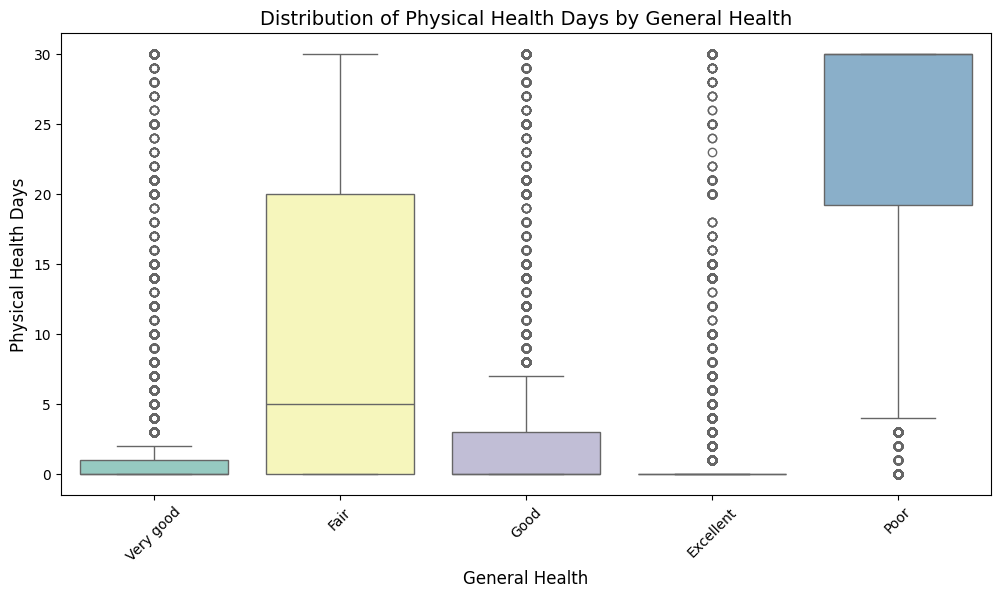

In [37]:
# Mental Health and Substance Use Exploration
data = df.copy()
plt.figure(figsize=(12, 6))
sns.boxplot(x="GeneralHealth", y="PhysicalHealthDays", data=data, palette="Set3")
plt.title("Distribution of Physical Health Days by General Health", fontsize=14)
plt.xlabel("General Health", fontsize=12)
plt.ylabel("Physical Health Days", fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19056\1779779977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="GeneralHealth", y="MentalHealthDays", data=data, palette="Set2")


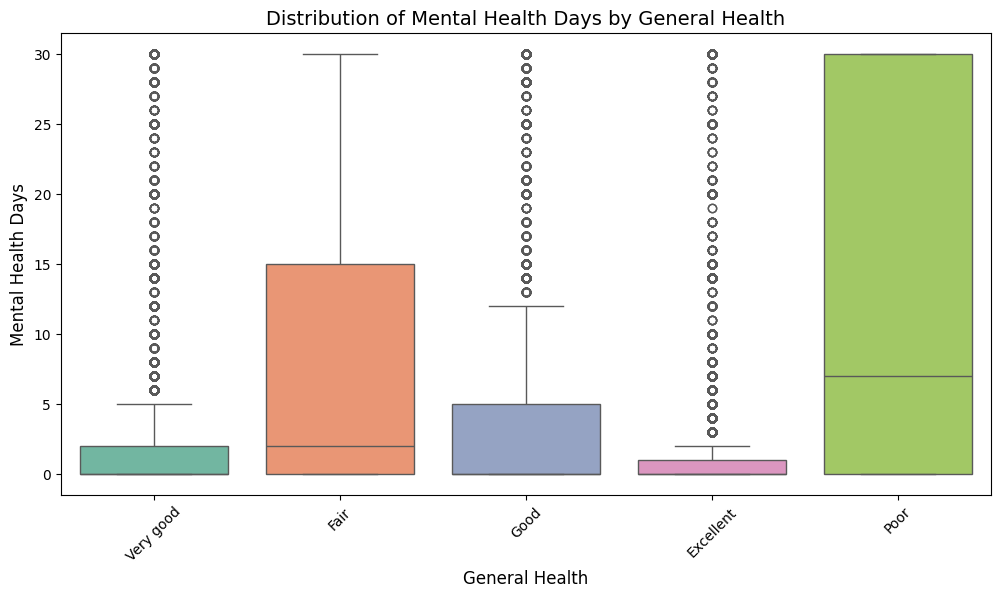

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="GeneralHealth", y="MentalHealthDays", data=data, palette="Set2")
plt.title("Distribution of Mental Health Days by General Health", fontsize=14)
plt.xlabel("General Health", fontsize=12)
plt.ylabel("Mental Health Days", fontsize=12)
plt.xticks(rotation=45)
plt.show()

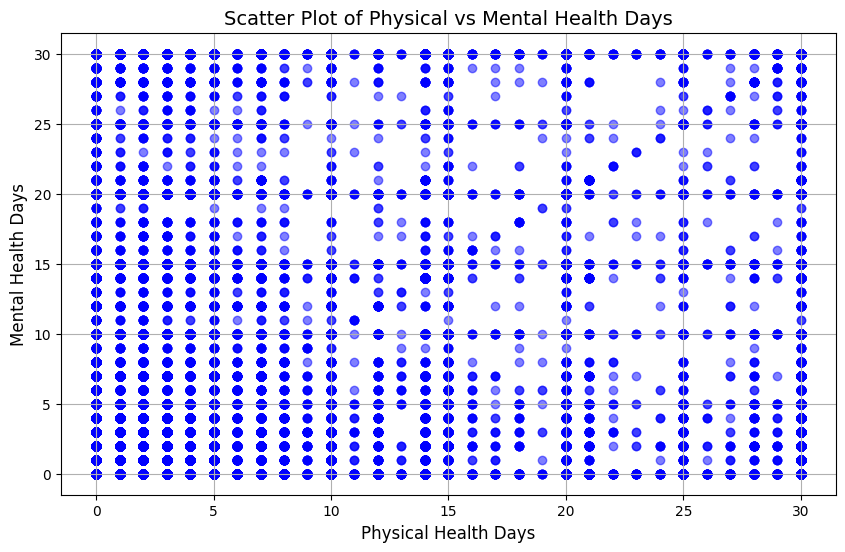

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(data["PhysicalHealthDays"], data["MentalHealthDays"], alpha=0.5, color='b')
plt.title("Scatter Plot of Physical vs Mental Health Days", fontsize=14)
plt.xlabel("Physical Health Days", fontsize=12)
plt.ylabel("Mental Health Days", fontsize=12)
plt.grid(True)
plt.show()

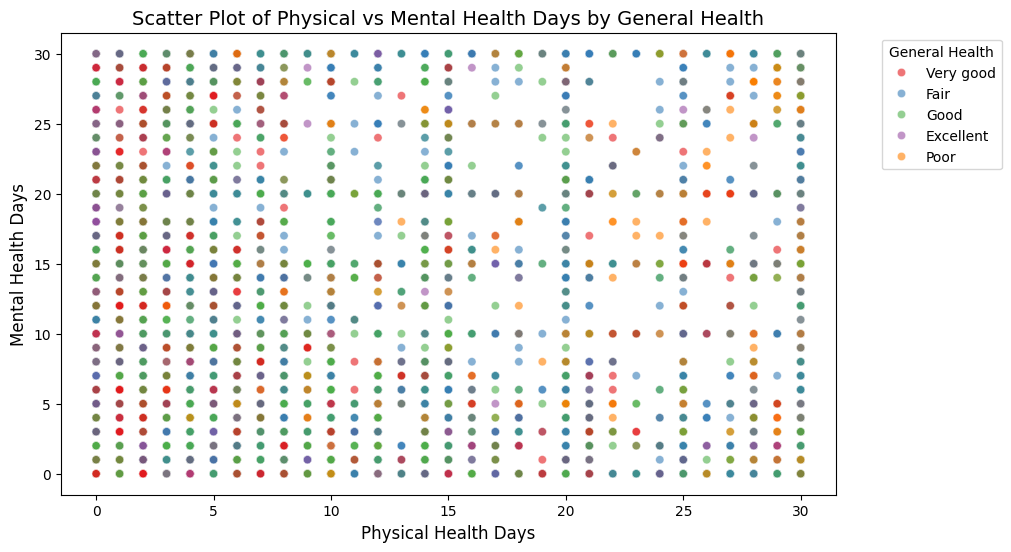

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PhysicalHealthDays",
    y="MentalHealthDays",
    hue="GeneralHealth",
    data=data,
    palette="Set1",
    alpha=0.6
)
plt.title("Scatter Plot of Physical vs Mental Health Days by General Health", fontsize=14)
plt.xlabel("Physical Health Days", fontsize=12)
plt.ylabel("Mental Health Days", fontsize=12)
plt.legend(title="General Health", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

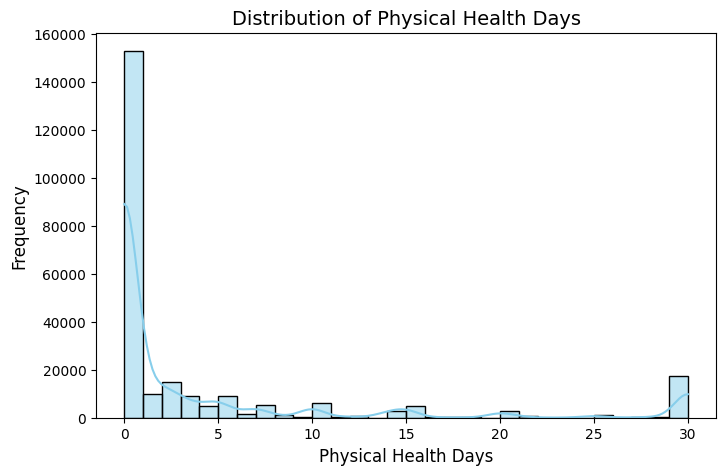

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(data["PhysicalHealthDays"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Physical Health Days", fontsize=14)
plt.xlabel("Physical Health Days", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

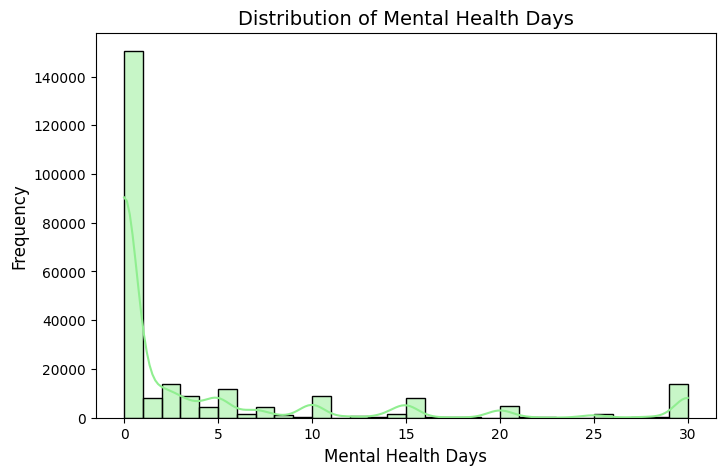

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(data["MentalHealthDays"], bins=30, kde=True, color='lightgreen')
plt.title("Distribution of Mental Health Days", fontsize=14)
plt.xlabel("Mental Health Days", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

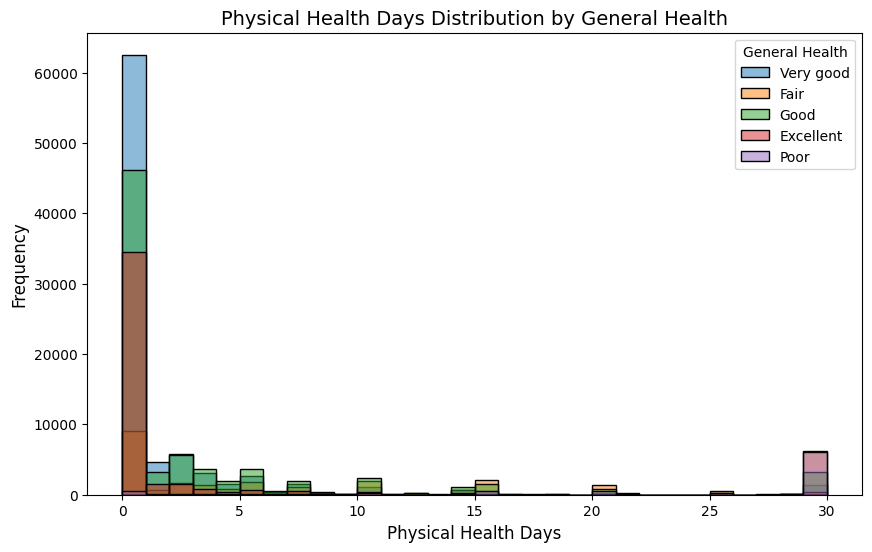

In [43]:
plt.figure(figsize=(10, 6))
for health in data["GeneralHealth"].unique():
    subset = data[data["GeneralHealth"] == health]
    sns.histplot(
        subset["PhysicalHealthDays"],
        bins=30,
        kde=False,
        label=health,
        alpha=0.5
    )

plt.title("Physical Health Days Distribution by General Health", fontsize=14)
plt.xlabel("Physical Health Days", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="General Health")
plt.show()

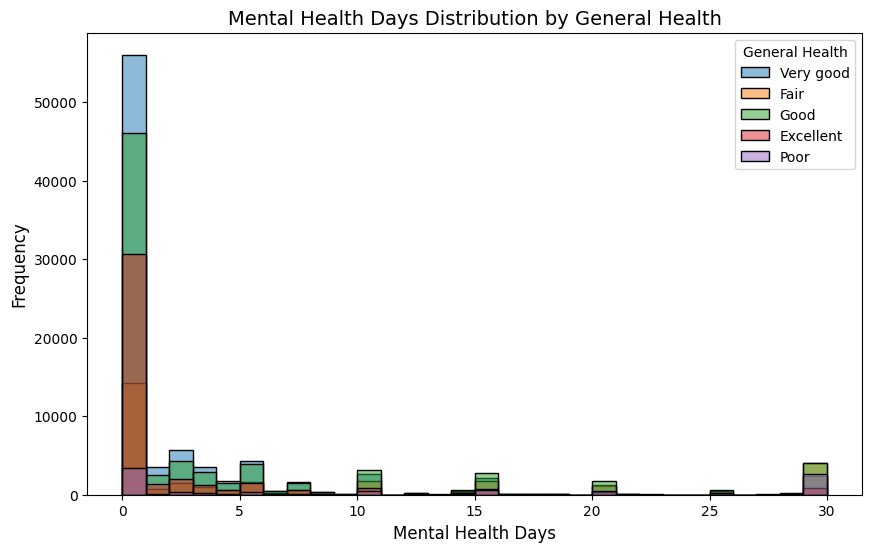

In [44]:
plt.figure(figsize=(10, 6))
for health in data["GeneralHealth"].unique():
    subset = data[data["GeneralHealth"] == health]
    sns.histplot(
        subset["MentalHealthDays"],
        bins=30,
        kde=False,
        label=health,
        alpha=0.5
    )

plt.title("Mental Health Days Distribution by General Health", fontsize=14)
plt.xlabel("Mental Health Days", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="General Health")
plt.show()

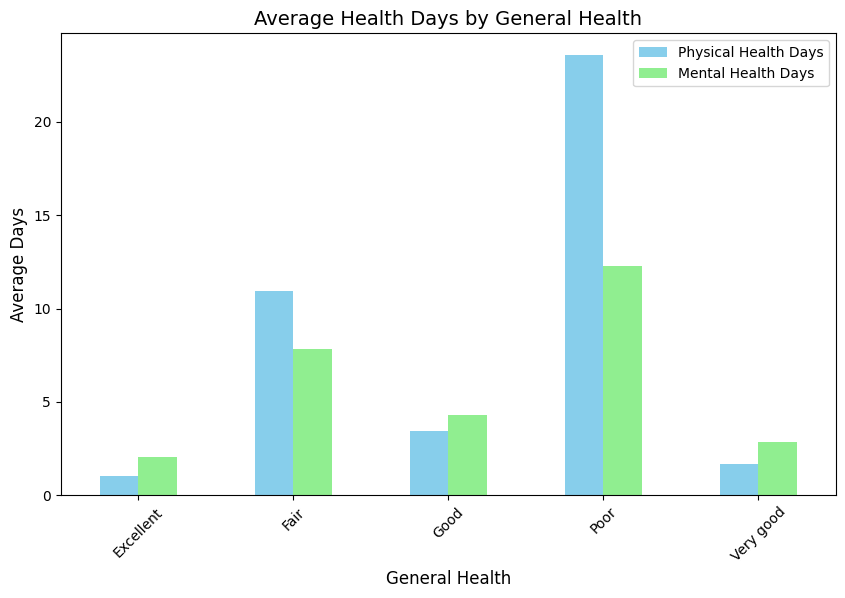

In [45]:
means = data.groupby("GeneralHealth")[["PhysicalHealthDays", "MentalHealthDays"]].mean()

# Bar plot of means
means.plot(kind="bar", figsize=(10, 6), color=["skyblue", "lightgreen"])
plt.title("Average Health Days by General Health", fontsize=14)
plt.ylabel("Average Days", fontsize=12)
plt.xlabel("General Health", fontsize=12)
plt.legend(["Physical Health Days", "Mental Health Days"])
plt.xticks(rotation=45)
plt.show()